In [5]:
classToColors = {
    '나이트로드':'#4f3474',
    '나이트워커':'#54209d',
    '다크나이트':'#3c3630',
    '데몬슬레이어':'#663242',
    '데몬어벤져':'#eae5ff',
    '듀얼블레이더':'#201e29',
    '라라':'#f3e8d5',
    '루미너스':'#aaadba',
    '메르세데스':'#fce9b5',
    '메카닉':'#ba6eb5',
    '미하일':'#e8d398',
    '바이퍼':'#3471f1',
    '배틀메이지':'#fd3859',
    '보우마스터':'#873c5b',
    '블래스터':'#494c6f',
    '비숍':'#d6bfb6',
    '섀도어':'#911527',
    '소울마스터':'#eeca8e',
    '스트라이커':'#e35b55',
    '신궁':'#fc9177',
    '아델':'#84878f',
    '아란':'#fdfdfd',
    '아크':'#612b3e',
    '아크메이지(불,독)':'#fef2e4',
    '아크메이지(썬,콜)':'#daf5fd',
    '에반':'#c39d7d',
    '엔젤릭버스터':'#f5bed8',
    '와일드헌터':'#819a40',
    '윈드브레이커':'#295b47',
    '은월':'#50dcb9',
    '일리움':'#1698d6',
    '제논':'#232636',
    '제로':'#fef8d5',
    '카데나':'#f02355',
    '카이저':'#e7384a',
    '카인':'#4d0707',
    '칼리':'#a98d66',
    '캐논마스터':'#bf3431',
    '캡틴':'#c757dd',
    '키네시스':'#c7c8de',
    '팔라딘':'#d5ad81',
    '패스파인더':'#3a3963',
    '팬텀':'#184487',
    '플레임위자드':'#b02531',
    '호영':'#71f1eb',
    '히어로':'#6a5547'
}

In [2]:
import pandas as pd
import numpy as np

fnlist = ['../data/chall_rank_more/2025-01-16_1_100000.csv',
       '../data/chall_other/2025-01-16_2.csv',
       '../data/chall_other/2025-01-16_3.csv',
       '../data/chall_other/2025-01-16_4.csv']

df = pd.concat([
    pd.read_csv(fn) for fn in fnlist
])

df['merged_class_name'] = df.apply(
    lambda row: row['sub_class_name'] if pd.notna(row['sub_class_name']) else row['class_name'], axis=1
)

df = df[df['character_level'] >= 260]
group_counts = df.groupby('merged_class_name').size().sort_values(ascending=False)




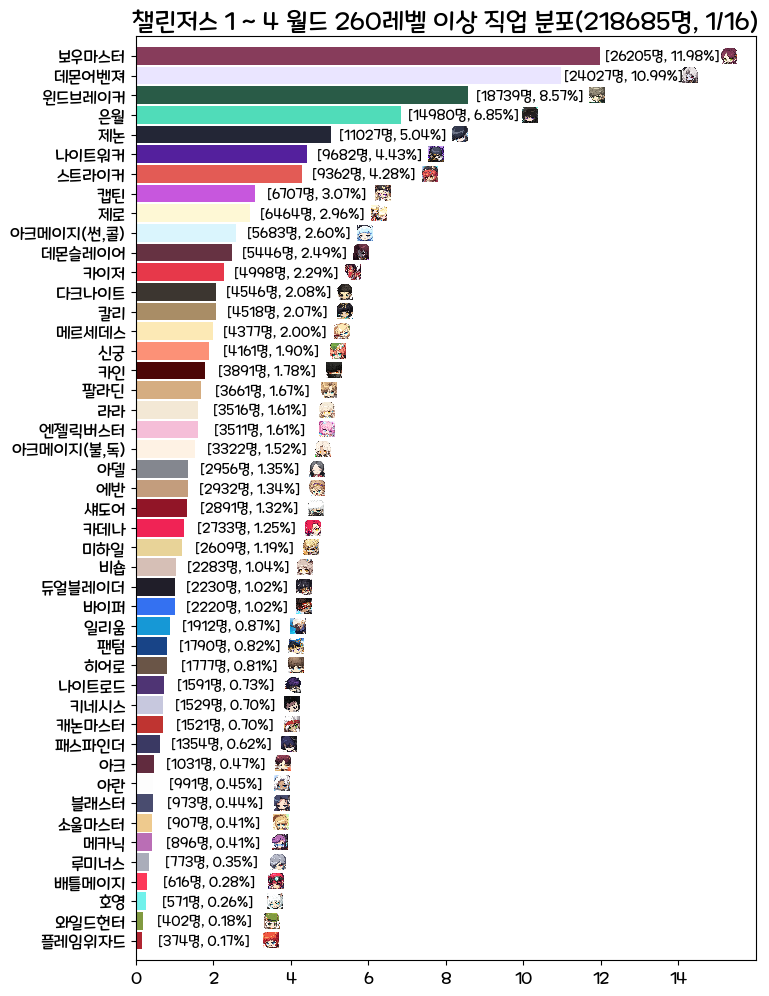

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

yLabel = group_counts.index.tolist()
xValue = group_counts.values.tolist()

xValueRaw = xValue
fn_font = '../MaplestoryFont_TTF/Maplestory Light.ttf' 
fontprop = fm.FontProperties(fname=fn_font, size=12)
xValue = np.squeeze(np.array(xValue))
xxx = np.sum(xValue)
xValue = xValue / np.sum(xValue) * 100

yValue = range(0, len(xValue))

colors = [classToColors[i] for i in yLabel]

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot()
ax.barh(yValue, xValue, height=0.90, color=colors)
ax.set_xlim(0,16)
ax.set_ylim(-1, 46)
plt.gca().invert_yaxis()

for i, label in enumerate(yLabel): 
    img = mpimg.imread(f'../data/class_img/{label}.png')
    imagebox = OffsetImage(img, zoom=0.07)  # zoom으로 크기 조절
    ab = AnnotationBbox(imagebox, (xValue[i]+3.32, yValue[i]), frameon=False)  
    ax.add_artist(ab)


for i, value in enumerate(xValue):
    ax.text(value+1.6, yValue[i], f'[{xValueRaw[i]}명, {round(value,2):.2f}%]', fontsize=10, va='center', ha='center', fontproperties=fontprop);
    # ax.text(value, yValue[i], f'[]', fontsize=10, va='center', ha='right', fontproperties=fontprop);
fontprop_title = fm.FontProperties(fname=fn_font, size=18)

ax.set_title(f'챌린저스 1 ~ 4 월드 260레벨 이상 직업 분포({xxx}명, 1/16)', fontproperties=fontprop_title)
ax.set_xticks(range(0,15,2));
ax.set_xticklabels(range(0,15,2), fontproperties=fontprop);
ax.set_yticks(range(0, len(yValue)));
ax.set_yticklabels(yLabel, fontproperties=fontprop);
